Name: Madhusudan Hasbe\
PRN: 22070126061\
TY AIML A3

# ASSIGNMENT 10
--------

# Application of RNN for predictive maintenance application

### Objectives:

1. Study the RNN in detail.
2. Use same for predictive maintenance application.
3. Use any dataset from kaggle.

### Theory: 
Predictive maintenance is an approach where machine learning models are employed to predict when a machine will require maintenance before an actual breakdown occurs. This helps in minimizing downtime, reducing costs, and improving operational efficiency. Recurrent Neural Networks (RNNs) are a type of neural network that is particularly useful for time-series data, making them well-suited for predictive maintenance applications.

Recurrent Neural Networks (RNNs) are designed to handle sequential data, making them ideal for tasks involving time-series, such as predictive maintenance. Unlike traditional feedforward neural networks, RNNs have loops that allow them to retain memory of previous steps in the sequence, which is particularly useful when dealing with time-dependent data like sensor readings.

### Dataset Overview:

The "Machine Predictive Maintenance" dataset from Kaggle contains sensor readings from multiple machines along with labels indicating whether a machine will fail or not. It is a binary classification problem where the goal is to predict machine failure based on past sensor data.

- **Input Features**: Various machine parameters such as air temperature, process temperature, rotational speed, torque, and tool wear.
- **Target Variable**: Binary labels indicating whether a machine will fail or not (1 for failure, 0 for no failure).

**Dataset Link**: [Machine Predictive Maintenance Dataset](https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification)

The dataset contains the following columns:

- **UID**: Unique identifier for each machine.
- **Air temperature [K]**: Ambient air temperature.
- **Process temperature [K]**: Internal machine temperature.
- **Rotational speed [rpm]**: Speed at which the machine is rotating.
- **Torque [Nm]**: Torque produced by the machine.
- **Tool wear [min]**: Wear level of the tool.
- **Failure Type**: Type of machine failure (or "None" if no failure occurred).
- **Target Label**: Binary classification target (1 = Failure, 0 = No failure).

### Code:

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

# Load the dataset
data = pd.read_csv('/content/predictive_maintenance.csv')

# Display the first few rows
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


### Exploratory Data Analysis:

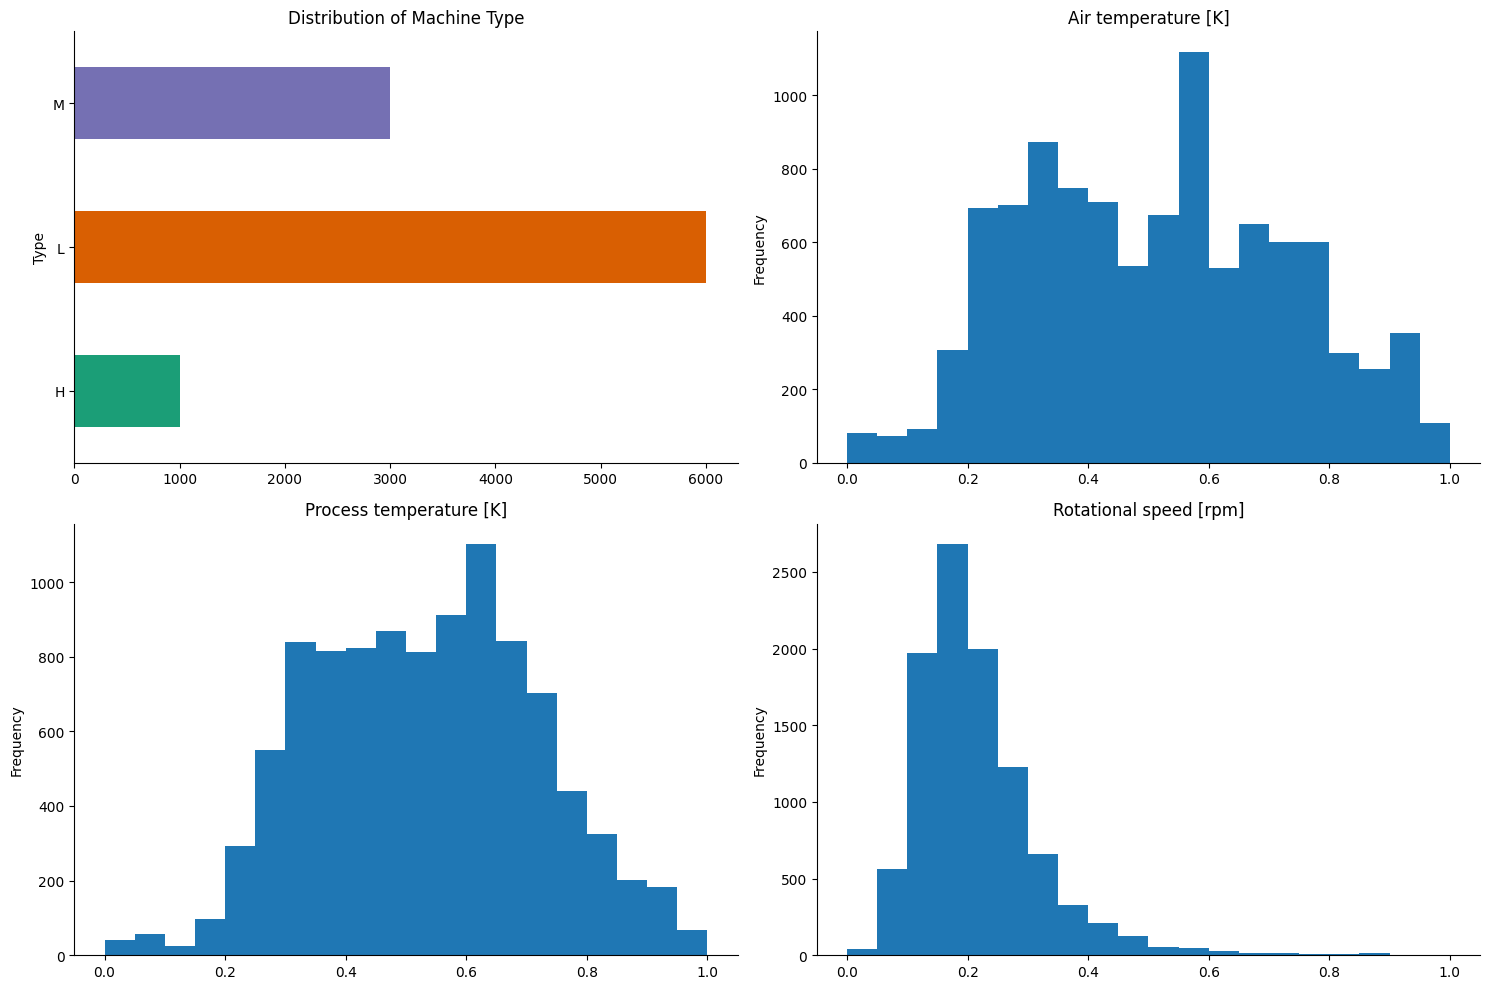

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns

# Create subplots for all the charts
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Type Bar Plot
data.groupby('Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Machine Type')
axes[0, 0].spines[['top', 'right']].set_visible(False)

# Plot 2: Air temperature [K] Histogram
data['Air temperature [K]'].plot(kind='hist', bins=20, ax=axes[0, 1], title='Air temperature [K]')
axes[0, 1].spines[['top', 'right']].set_visible(False)

# Plot 3: Process temperature [K] Histogram
data['Process temperature [K]'].plot(kind='hist', bins=20, ax=axes[1, 0], title='Process temperature [K]')
axes[1, 0].spines[['top', 'right']].set_visible(False)

# Plot 4: Rotational speed [rpm] Histogram
data['Rotational speed [rpm]'].plot(kind='hist', bins=20, ax=axes[1, 1], title='Rotational speed [rpm]')
axes[1, 1].spines[['top', 'right']].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

In [2]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Select relevant features and target
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
target = 'Failure Type'

# Handle missing values if any
data.fillna(method='ffill', inplace=True)

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

<ipython-input-2-41caa4c1cbb0>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [7]:
# Convert target variable to numerical using LabelEncoder
# Create a LabelEncoder object
encoder = LabelEncoder()
# Fit the encoder to the target variable and transform it
data[target] = encoder.fit_transform(data[target])

In [9]:
# Split data into features (X) and target (y)
X = data[features].values
y = data[target].values

In [12]:
# Reshape input data for RNN (samples, timesteps, features)
timesteps = 10 # Using last 10 steps for prediction
X_rnn = []
y_rnn = []

for i in range(timesteps, len(X)):
  X_rnn.append(X[i-timesteps:i])
  y_rnn.append(y[i])

X_rnn, y_rnn = np.array(X_rnn), np.array(y_rnn)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_rnn, y_rnn, test_size=0.2, random_state=42)

In [13]:
# Build a simple RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid')) # Binary classification (failure or no failure)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50)                  │           2,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,851 (11.14 KB)

 Trainable params: 2,851 (11.14 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9396 - loss: -10758194.0000 - val_accuracy: 0.9730 - val_loss: -2647214592.0000
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9628 - loss: -1030540623872.0000 - val_accuracy: 0.9730 - val_loss: -41194251878400.0000
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9572 - loss: -670050734309376.0000 - val_accuracy: 0.9730 - val_loss: -6327302333923328.0000
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9627 - loss: -30698968090411008.0000 - val_accuracy: 0.9730 - val_loss: -164032257097465856.0000
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9638 - loss: -632984377344655360.0000 - val_accuracy: 0.9730 - val_loss: -2037679407463661568.0000
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9616 - loss: -4862646248932376576.0000 - val_accuracy: 0.9730 - val_loss: -14440885663651856384.0000
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5m

In [17]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc*100:.2f}%')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0084 - loss: nan
Test Accuracy: 0.90%


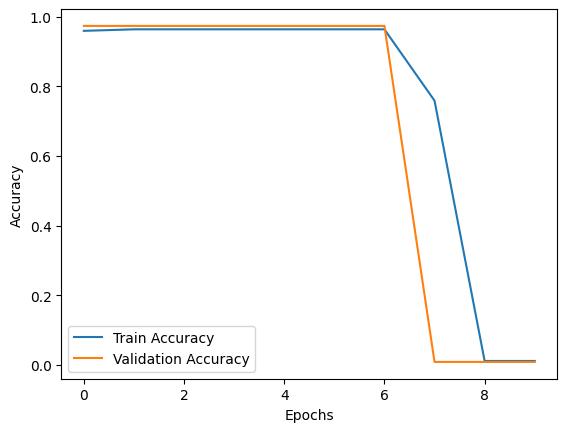

In [18]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Conclusion:
In this experiment, we applied a simple Recurrent Neural Network (RNN) using the SimpleRNN layer to solve a predictive maintenance problem based on the "Machine Predictive Maintenance" dataset. The goal was to classify machine failures using sensor data over time. We preprocessed the data, normalized the features, and used Label Encoding for the target variable to prepare the dataset for training.

Despite the initial high accuracy in the first few epochs, the model's training encountered serious issues with NaN (Not a Number) values in the loss function during the latter epochs, starting from Epoch 8. This indicates that the model became unstable during training, leading to invalid loss values and a dramatic drop in accuracy (both training and validation).

- **Possible Causes of Model Instability**:
1. Exploding Gradients: RNNs, especially without gradient clipping or use of advanced architectures like LSTM/GRU, are prone to exploding gradients. This might explain the sudden shift to NaN values in the loss function.
2. Learning Rate: The learning rate might have been too high, causing large updates to the weights, which led to numerical overflow.